## Problem Statement
   Design and implement a machine learning model to predict the winner of the World cup based on historical data and team attributes 


#Import the required library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

#Data Collection and Data Processing

In [2]:
# Read the data from "World_cup_2023.csv" into the 'World_cup' DataFrame
World_cup = pd.read_csv(r"C:\Users\anike\Downloads\archive (2)\World_cup_2023.csv")

# Read the data from "results.csv" into the 'results' DataFrame
results = pd.read_csv(r"C:\Users\anike\Downloads\archive (2)\results.csv")

In [3]:
World_cup

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


In [4]:
World_cup.isnull().sum()

Team_name             0
Team_ranking          0
Titles                0
Win_percentage_ODI    0
WC_matches            0
WC_match_won          0
Win_percent_WC        0
WC_match_loss         0
Loss_percent_WC       0
Tied                  0
No_result             0
World_cup_winner      0
Recent_points         0
Rating                0
dtype: int64

In [5]:
World_cup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [6]:
World_cup.tail()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


In [7]:
World_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team_name           10 non-null     object 
 1   Team_ranking        10 non-null     int64  
 2   Titles              10 non-null     int64  
 3   Win_percentage_ODI  10 non-null     float64
 4   WC_matches          10 non-null     int64  
 5   WC_match_won        10 non-null     int64  
 6   Win_percent_WC      10 non-null     float64
 7   WC_match_loss       10 non-null     int64  
 8   Loss_percent_WC     10 non-null     float64
 9   Tied                10 non-null     int64  
 10  No_result           10 non-null     int64  
 11  World_cup_winner    10 non-null     object 
 12  Recent_points       10 non-null     int64  
 13  Rating              10 non-null     int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.2+ KB


In [8]:
World_cup.describe()

,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,Recent_points,Rating
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1.000000,48.935000,64.800000,36.200000,47.048000,26.800000,50.561000,0.800000,1.000000,2362.900000,96.800000
std,3.02765,1.563472,8.825435,29.199696,23.093048,22.737065,7.598245,23.829437,0.788811,0.666667,785.510655,23.436913
min,1.00000,0.000000,34.210000,15.000000,1.000000,6.660000,14.000000,24.460000,0.000000,0.000000,1044.000000,37.000000
25%,3.25000,0.000000,45.777500,46.000000,20.000000,38.125000,23.000000,36.215000,0.000000,1.000000,2011.500000,92.750000
50%,5.50000,0.500000,49.985000,79.500000,41.500000,57.395000,27.000000,39.525000,1.000000,1.000000,2438.500000,101.000000
75%,7.75000,1.000000,52.680000,83.750000,51.750000,60.345000,32.000000,59.062500,1.000000,1.000000,2774.000000,112.250000
max,10.00000,5.000000,61.000000,94.000000,69.000000,73.400000,39.000000,93.330000,2.000000,2.000000,3807.000000,118.000000


In [9]:
World_cup.shape

(10, 14)

In [10]:
World_cup.size

140

In [11]:
World_cup.value_counts()

Team_name     Team_ranking  Titles  Win_percentage_ODI  WC_matches  WC_match_won  Win_percent_WC  WC_match_loss  Loss_percent_WC  Tied  No_result  World_cup_winner  Recent_points  Rating
Afghanistan   8             0       49.65               15          1             6.66            14             93.33            0     0          No                1361           91        1
Australia     1             5       60.73               94          69            73.40           23             24.46            1     1          Yes               2714           118       1
Bangladesh    7             0       36.65               40          14            35.00           25             62.50            0     1          No                2451           98        1
England       5             1       50.32               83          48            57.83           32             38.55            2     1          Yes               2426           101       1
India         3             2       52.38    

#No.of titles won by each teams

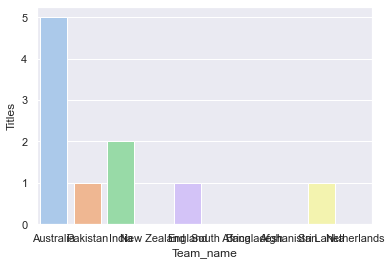

In [12]:
sns.set(rc={'figure.figsize':(20, 5)})
# Create a bar plot using sns.barplot to visualize team titles
colours = sns.color_palette("pastel")
sns.barplot(x = "Team_name", y = "Titles", data = World_cup,palette=colours)
plt.show() # Display the plot

#Win percentage in ODI by each team

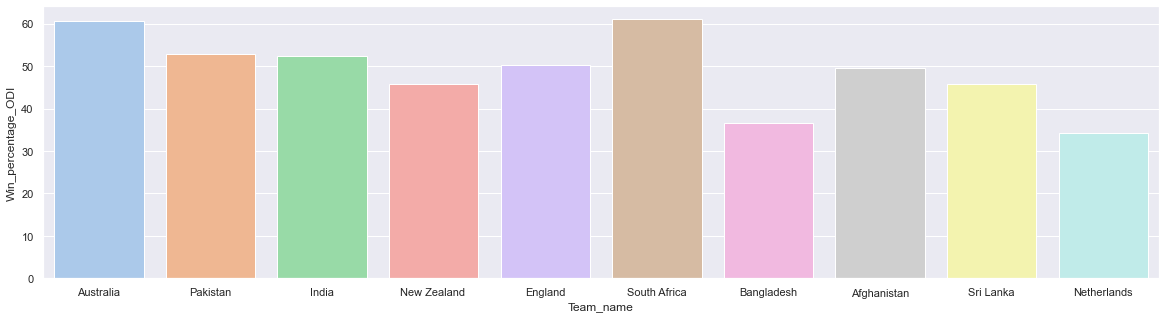

In [13]:
sns.set(rc ={'figure.figsize':(20,5)})
# Create a bar plot using Seaborn
colours = sns.color_palette("pastel")
sns.barplot(x = 'Team_name',y = 'Win_percentage_ODI',data = World_cup,palette=colours)
plt.show()

#No.of matches won in world cup by each team

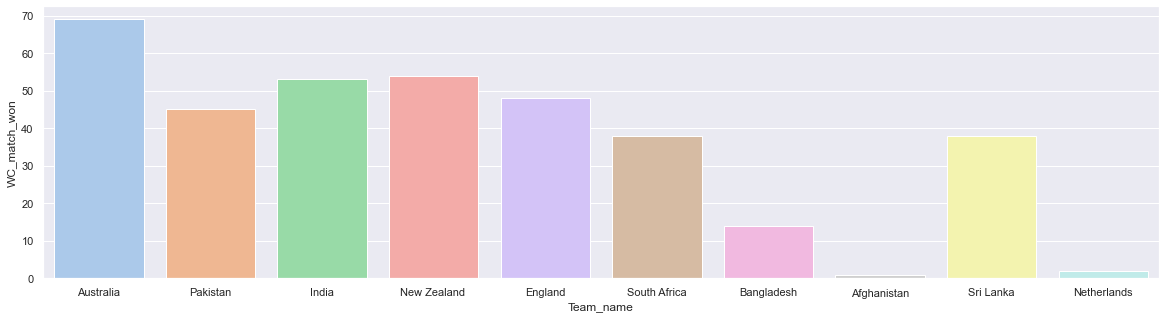

In [14]:
sns.set(rc = {'figure.figsize':(20,5)})
colours = sns.color_palette("pastel")
sns.barplot(x='Team_name', y='WC_match_won', data=World_cup,palette=colours)
plt.show()

#Recent ICC ODI Ranking

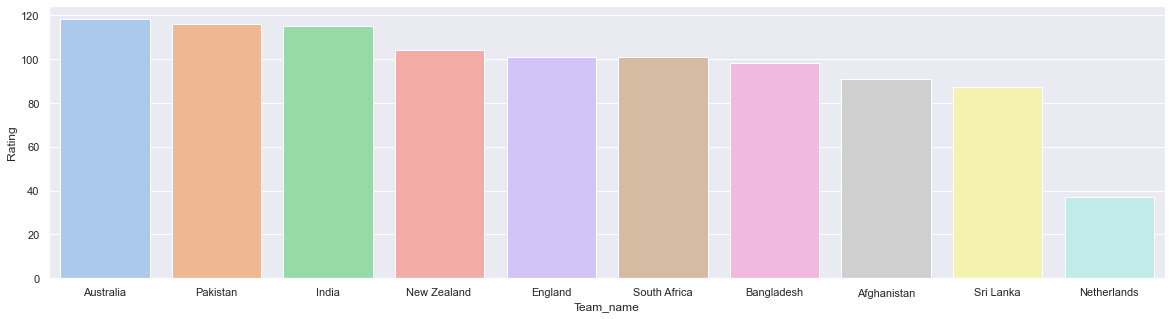

In [15]:
sns.set(rc = {'figure.figsize':(20,5)})
colours = sns.color_palette("pastel")
sns.barplot(x ='Team_name',y ='Rating',data= World_cup,palette=colours)
plt.show()

In [16]:
results

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium
...,...,...,...,...,...,...
717,06/07/2023,Netherlands,Scotland,Netherlands,won by 4 wickets,Queens Sports Club
718,07/07/2023,Sri Lanka,West Indies,Sri Lanka,won by 8 wickets,Harare Sports Club
719,08/07/2023,Bangladesh,Afghanistan,Afghanistan,won by 142 runs,Zahur Ahmed Chowdhury Stadium
720,09/07/2023,Netherlands,Sri Lanka,Sri Lanka,won by 128 runs,Harare Sports Club


In [17]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [18]:
results.tail()

,Date,Team_1,Team_2,Winner,Margin,Ground
717,06/07/2023,Netherlands,Scotland,Netherlands,won by 4 wickets,Queens Sports Club
718,07/07/2023,Sri Lanka,West Indies,Sri Lanka,won by 8 wickets,Harare Sports Club
719,08/07/2023,Bangladesh,Afghanistan,Afghanistan,won by 142 runs,Zahur Ahmed Chowdhury Stadium
720,09/07/2023,Netherlands,Sri Lanka,Sri Lanka,won by 128 runs,Harare Sports Club
721,11/07/2023,Bangladesh,Afghanistan,Bangladesh,won by 7 wickets,Zahur Ahmed Chowdhury Stadium


In [19]:
results.describe()

,Date,Team_1,Team_2,Winner,Margin,Ground
count,722,722,722,722,722,722
unique,624,34,23,31,201,105
top,21/01/2022,England,India,India,won by 7 wickets,Harare Sports Club
freq,3,44,79,68,61,40


In [20]:
results.shape

(722, 6)

In [21]:
results.size

4332

In [22]:
# Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."
results.drop(results[(results['Winner'] == 'Match abandoned')].index, inplace=True)
results.drop(results[(results['Winner'] == 'No result')].index, inplace=True)

#Stats of top five teams in the ODI world cup 2023

#Stats of Indian team

In [23]:
# Filter the 'results' DataFrame to include rows where India played either as Team_1 or Team_2
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
India = df.iloc[:]
India.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


In [24]:
# Filtering the 'India' dataframe to create a new dataframe 'India_win' containing rows where the 'Winner' column is 'India'.
India_win = India[India['Winner'] =='India']
India_win

,Date,Team_1,Team_2,Winner,Margin,Ground
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club
20,14/07/2015,Zimbabwe,India,India,won by 83 runs,Harare Sports Club
73,23/01/2016,Australia,India,India,won by 6 wickets,Sydney Cricket Ground
87,11/06/2016,Zimbabwe,India,India,won by 9 wickets,Harare Sports Club
89,13/06/2016,Zimbabwe,India,India,won by 8 wickets,Harare Sports Club
91,15/06/2016,Zimbabwe,India,India,won by 10 wickets,Harare Sports Club
141,23/10/2016,India,New Zealand,India,won by 7 wickets,Punjab Cricket Association IS Bindra Stadium
288,01/02/2018,South Africa,India,India,won by 6 wickets,Kingsmead


#No.of wins in ODIs against other teams

In [25]:
excluded_value = 'India'
df = India_win[India_win['Team_2']!= excluded_value]
value_counts = df['Team_2'].value_counts()
print(value_counts)

Team_2
West Indies     6
New Zealand     4
Australia       3
Sri Lanka       3
England         2
South Africa    2
Name: count, dtype: int64


In [26]:
excluded_value = 'India'
df = India_win[India_win['Team_1']!= excluded_value]
value_counts = df['Team_1'].value_counts()
print(value_counts)

Team_1
Zimbabwe         5
South Africa     5
West Indies      5
Bangladesh       4
Zimbabwe         4
Australia        2
Sri Lanka        2
England          2
England          1
Hong Kong        1
New Zealand      1
Afghanistan      1
Australia        1
Bangladesh       1
Name: count, dtype: int64


#Win Percentage of India Against Each Team

In [27]:
# Out of the 1032 ODI matches played by India, number of matches won against the following teams
team_win_counts = {
    'Australia': 54,
    'New Zealand': 58,
    'South Africa ': 37,
    'Pakistan': 	55,
    'Sri Lanka': 93,
    'Bangladesh': 30,
    'England': 57,
    'Netherlands': 2,
    'Afghanistan': 3
}

Total_matches = sum(team_win_counts.values())
Total_matches

389

In [28]:
Win_percentage = {team: (wins / Total_matches) * 100 for team, wins in team_win_counts.items()}

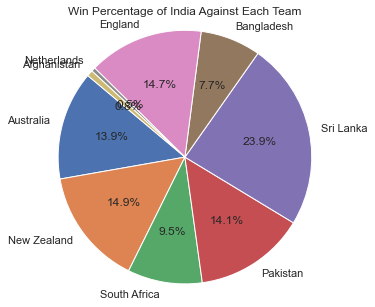

In [29]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(Win_percentage.values(),labels=Win_percentage.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of India Against Each Team')
plt.show()

#Win Percentage of India in the ODI world cup

In [30]:
# Out of the 84 ODI matches played by India in the ODI world cup, number of matches won against the following teams
team_win_counts_wc = {
    'Australia': 4,
    'New Zealand': 3,
    'South Africa ': 2,
    'Pakistan': 7,
    'Sri Lanka': 5,
    'Bangladesh': 3,
    'England': 3,
    'Netherlands': 2,
    'Afghanistan': 2
}

Total_matches_wc = sum(team_win_counts_wc.values())
Total_matches_wc

31

In [31]:
Win_percentage_wc = {team: (wins / Total_matches_wc) * 100 for team, wins in team_win_counts_wc.items()}

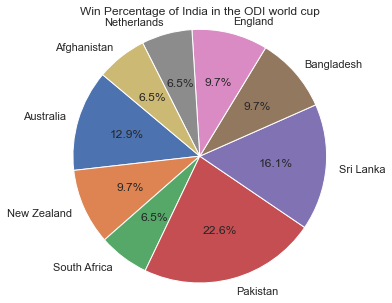

In [32]:
plt.figure(figsize=(5,5))
plt.pie(Win_percentage_wc.values(),labels=Win_percentage_wc.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of India in the ODI world cup')
plt.show()

#Stats of Australia team

In [33]:
# Filter the 'results' DataFrame to include rows where Australia played either as Team_1 or Team_2
df1 = results[(results['Team_1'] == 'Australia') | (results['Team_2'] == 'Australia')]
Australia = df1.iloc[:]
Australia.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
32,27/08/2015,Ireland,Australia,Australia,won by 23 runs,Civil Service Cricket Club
33,03/09/2015,England,Australia,Australia,won by 59 runs,The Rose Bowl
34,05/09/2015,England,Australia,Australia,won by 64 runs,Lord's
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
36,11/09/2015,England,Australia,England,won by 3 wickets,Headingley


In [34]:
# Filtering the 'Australia' dataframe to create a new dataframe 'Australia_win' containing rows where the 'Winner' column is 'Australia'.
Australia_win = Australia[Australia['Winner'] == 'Australia']
Australia_win

,Date,Team_1,Team_2,Winner,Margin,Ground
37,12/09/2015,England,Australia,Australia,won by 8 wickets,Old Trafford
79,06/02/2016,New Zealand,Australia,Australia,won by 4 wickets,Sky Stadium
85,05/06/2016,West Indies,Australia,Australia,won by 6 wickets,Providence Stadium
88,11/06/2016,Australia,South Africa,Australia,won by 36 runs,Warner Park
97,21/06/2016,West Indies,Australia,Australia,won by 6 wickets,Kensington Oval
101,26/06/2016,West Indies,Australia,Australia,won by 58 runs,Kensington Oval
113,21/08/2016,Sri Lanka,Australia,Australia,won by 3 wickets,R Premadasa Stadium
117,28/08/2016,Sri Lanka,Australia,Australia,won by 2 wickets,Rangiri Dambulla International Stadium
119,31/08/2016,Sri Lanka,Australia,Australia,won by 6 wickets,Rangiri Dambulla International Stadium
122,04/09/2016,Sri Lanka,Australia,Australia,won by 5 wickets,Pallekele International Cricket Stadium


#No.of wins for Australia against other teams

In [35]:
excluded_value = 'Australia'
df2 = Australia_win[Australia_win['Team_2']!= excluded_value]
value_counts2 = df2['Team_2'].value_counts()

df1 = Australia_win[Australia_win['Team_1']!= excluded_value]
value_counts1 = df1['Team_1'].value_counts()
print("Team_2 value counts:")
print(value_counts2)

print("\nTeam_1 value counts:")
print(value_counts1)

Team_2 value counts:
Team_2
England         4
New Zealand     4
 Pakistan       2
India           2
Zimbabwe        2
South Africa    1
Pakistan        1
Name: count, dtype: int64

Team_1 value counts:
Team_1
Sri Lanka       4
Pakistan        4
West Indies     3
India           3
England         2
Pakistan        2
England         2
West Indies     2
Sri Lanka       2
India           2
New Zealand     1
Afghanistan     1
Name: count, dtype: int64


#Win Percentage of Australia Against Each Team

In [36]:
# Out of the 978 ODI matches played by Australia, number of matches won against the following teams
team_win_counts = {
    'India': 82,
    'New Zealand': 95,
    'South Africa ': 48,
    'Pakistan': 69,
    'Sri Lanka': 63,
    'Bangladesh': 19,
    'England': 87,
    'Netherlands': 2,
    'Afghanistan': 3
}

Total_matches = sum(team_win_counts.values())
Total_matches

468

In [37]:
Win_percentage = {team: (wins / Total_matches) * 100 for team, wins in team_win_counts.items()}

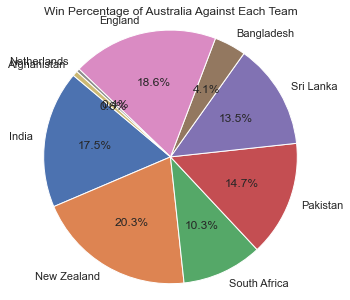

In [38]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(Win_percentage.values(),labels=Win_percentage.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of Australia Against Each Team')
plt.show()

#Win Percentage of Australia in the ODI world cup

In [39]:
# Out of the 94 ODI matches played by Australia in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_aus = {
    'India': 8,
    'New Zealand': 8,
    'South Africa ': 3,
    'Pakistan': 6,
    'Sri Lanka': 8,
    'Bangladesh': 3,
    'England': 6,
    'Netherlands': 2,
    'Afghanistan': 2
}

Total_matches_wc_aus = sum(team_win_counts_wc_aus.values())
Total_matches_wc_aus

46

In [40]:
win_percentages_wc_aus = {team: (wins / Total_matches_wc_aus) * 100 for team, wins in team_win_counts_wc_aus.items()}

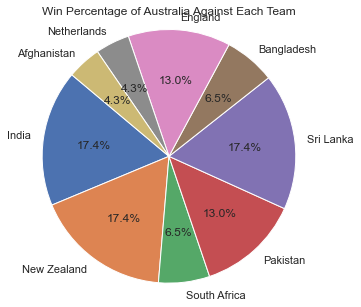

In [41]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentages_wc_aus.values(),labels=win_percentages_wc_aus.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of Australia Against Each Team')
plt.show()

#Stats of Pakistan team

In [42]:
# Filter the 'results' DataFrame to include rows where Pakistan played either as Team_1 or Team_2
df2 = results[(results['Team_1'] == 'Pakistan') | (results['Team_2'] == 'Pakistan')]
Pakistan = df2.iloc[:]
Pakistan.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
21,15/07/2015,Sri Lanka,Pakistan,Sri Lanka,won by 2 wickets,Pallekele International Cricket Stadium


In [43]:
# Filtering the 'Pakistan' dataframe to create a new dataframe 'Pakistan_win' containing rows where the 'Winner' column is 'Pakistan'.
Pakistan_win = Pakistan[Pakistan['Winner']=='Pakistan']
Pakistan_win

,Date,Team_1,Team_2,Winner,Margin,Ground
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
23,19/07/2015,Sri Lanka,Pakistan,Pakistan,won by 135 runs,R Premadasa Stadium
24,22/07/2015,Sri Lanka,Pakistan,Pakistan,won by 7 wickets,R Premadasa Stadium
38,01/10/2015,Zimbabwe,Pakistan,Pakistan,won by 131 runs,Harare Sports Club
40,05/10/2015,Zimbabwe,Pakistan,Pakistan,won by 7 wickets,Harare Sports Club
111,18/08/2016,Ireland,Pakistan,Pakistan,won by 255 runs,The Village
121,04/09/2016,England,Pakistan,Pakistan,won by 4 wickets,Sophia Gardens
159,15/01/2017,Australia,Pakistan,Pakistan,won by 6 wickets,Melbourne Cricket Ground
315,13/07/2018,Zimbabwe,Pakistan,Pakistan,won by 201 runs,Queens Sports Club
317,16/07/2018,Zimbabwe,Pakistan,Pakistan,won by 9 wickets,Queens Sports Club


#No.of wins for Pakistan against other teams

In [44]:
excluded_value = 'Pakistan'
df2 = Pakistan_win[Pakistan_win['Team_2']!= excluded_value]
value_counts2 = df2['Team_2'].value_counts()

df1 = Pakistan_win[Pakistan_win['Team_1']!= excluded_value]
value_counts1 = df1['Team_1'].value_counts()
print("Team_2 value counts:")
print(value_counts2)

print("\nTeam_1 value counts:")
print(value_counts1)

Team_2 value counts:
Team_2
New Zealand    5
West Indies    3
Sri Lanka      2
Zimbabwe       2
Australia      2
Name: count, dtype: int64

Team_1 value counts:
Team_1
Zimbabwe         7
Sri Lanka        3
Netherlands      3
England          2
Afghanistan      2
South Africa     2
Ireland          1
Australia        1
Hong Kong        1
South Africa     1
New Zealand      1
Name: count, dtype: int64


#Win Percentage of Pakistan Against Each Team

In [45]:
# Out of the 945 ODI matches played by Pakistan, number of matches won against the following teams
team_win_counts = {
    'India': 73,
    'New Zealand': 60,
    'South Africa ': 30,
    'Australia': 34,
    'Sri Lanka': 92,
    'Bangladesh': 32,
    'England': 32,
    'Netherlands': 3,
    'Afghanistan': 7
}

Total_matches = sum(team_win_counts.values())
Total_matches

363

In [46]:
Win_percentage = {team: (wins/ Total_matches) * 100 for team, wins in team_win_counts.items()}
Win_percentage

{'India': 20.110192837465565,
 'New Zealand': 16.528925619834713,
 'South Africa ': 8.264462809917356,
 'Australia': 9.366391184573002,
 'Sri Lanka': 25.344352617079892,
 'Bangladesh': 8.81542699724518,
 'England': 8.81542699724518,
 'Netherlands': 0.8264462809917356,
 'Afghanistan': 1.9283746556473829}

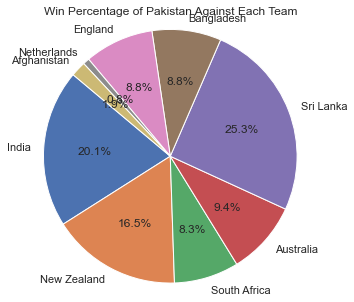

In [47]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(Win_percentage.values(),labels=Win_percentage.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of Pakistan Against Each Team')
plt.show()

#Win Percentage of Pakistan in the ODI world cup

In [48]:
# Out of the 79 ODI matches played by Pakistan in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_pak = {
    'India': 0,
    'New Zealand': 7,
    'South Africa ': 2,
    'Australia': 4,
    'Sri Lanka': 7,
    'Bangladesh': 1,
    'England': 5,
    'Afghanistan': 1
}

Total_matches_wc_pak = sum(team_win_counts_wc_pak.values())
Total_matches_wc_pak

27

In [49]:
win_percentages_wc_pak = {team: (wins / Total_matches_wc_pak) * 100 for team, wins in team_win_counts_wc_pak.items()}

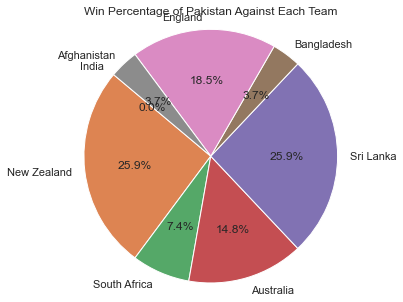

In [50]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentages_wc_pak.values(),labels=win_percentages_wc_pak.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of Pakistan Against Each Team')
plt.show()

#Stats of New Zealand team

In [51]:
# Filter the 'results' DataFrame to include rows where New Zealand played either as Team_1 or Team_2
df3 = results[(results['Team_1'] == 'New Zealand') | (results['Team_2'] == 'New Zealand')]
New_Zealand = df3.iloc[:]
New_Zealand.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
7,09/06/2015,England,New Zealand,England,won by 210 runs,Edgbaston
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
9,14/06/2015,England,New Zealand,New Zealand,won by 3 wickets,The Rose Bowl
10,17/06/2015,England,New Zealand,England,won by 7 wickets,Trent Bridge
12,20/06/2015,England,New Zealand,England,won by 3 wickets,Riverside Ground


In [52]:
# Filtering the 'New Zealand' dataframe to create a new dataframe 'NZ_win' containing rows where the 'Winner' column is 'New Zealand'.
NZ_win = New_Zealand[New_Zealand['Winner']=='New Zealand']
NZ_win

,Date,Team_1,Team_2,Winner,Margin,Ground
27,04/08/2015,Zimbabwe,New Zealand,New Zealand,won by 10 wickets,Harare Sports Club
28,07/08/2015,Zimbabwe,New Zealand,New Zealand,won by 38 runs,Harare Sports Club
76,31/01/2016,New Zealand,Pakistan,New Zealand,won by 3 wickets,Eden Park
81,08/02/2016,New Zealand,Australia,New Zealand,won by 55 runs,Seddon Park
140,20/10/2016,India,New Zealand,New Zealand,won by 6 runs,Arun Jaitley Stadium
142,26/10/2016,India,New Zealand,New Zealand,won by 19 runs,JSCA International Stadium Complex
154,26/12/2016,New Zealand,Bangladesh,New Zealand,won by 77 runs,Hagley Oval
200,14/05/2017,Ireland,New Zealand,New Zealand,won by 51 runs,The Village
271,06/01/2018,New Zealand,Pakistan,New Zealand,won by 61 runs,Basin Reserve
365,07/11/2018,Pakistan,New Zealand,New Zealand,won by 47 runs,Sheikh Zayed Stadium


#No.of wins for New Zealand in ODIs against other teams

In [53]:
excluded_value = 'New Zealand'
df2 = NZ_win[NZ_win['Team_2']!= excluded_value]
value_counts2 = df2['Team_2'].value_counts()

df1 = NZ_win[NZ_win['Team_1']!= excluded_value]
value_counts1 = df1['Team_1'].value_counts()
print("Team_2 value counts:")
print(value_counts2)

print("\nTeam_1 value counts:")
print(value_counts1)

Team_2 value counts:
Team_2
Bangladesh      5
India           4
Sri Lanka       3
Netherlands     3
Pakistan        2
Australia       1
South Africa    1
Name: count, dtype: int64

Team_1 value counts:
Team_1
India           3
Pakistan        3
Ireland         3
Zimbabwe        2
West Indies     2
Ireland         1
Bangladesh      1
Afghanistan     1
Scotland        1
Name: count, dtype: int64


#Win Percentage of New Zealand Against Each Team

In [54]:
# Out of the 794 ODI matches played by New Zealand, number of matches won against the following teams
team_win_counts = {
    'Australia': 39,
    'India': 50,
    'South Africa ': 26,
    'Pakistan': 50,
    'Sri Lanka': 49,
    'Bangladesh':28,
    'England': 42,
    'Netherlands': 4,
    'Afghanistan': 2
}

Total_matches = sum(team_win_counts.values())
Total_matches

290

In [55]:
win_percentage = {team: (wins / Total_matches) * 100 for team, wins in team_win_counts.items()}

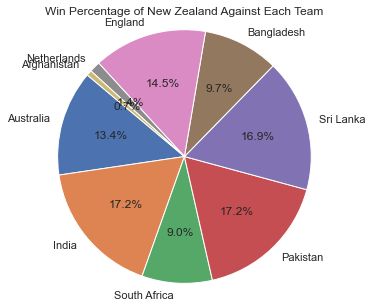

In [56]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentage.values(),labels=win_percentage.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of New Zealand Against Each Team')
plt.show()

#Win Percentage of New Zealand in the ODI world cup

In [57]:
# Out of the 89 ODI matches played by New Zealand in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_nz = {
    'Australia': 3,
    'India': 5,
    'South Africa ': 5,
    'Pakistan': 2,
    'Sri Lanka': 5,
    'Bangladesh': 5,
    'England': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

Total_matches_wc_nz = sum(team_win_counts_wc_nz.values())
Total_matches_wc_nz

36

In [58]:
win_percentages_wc_nz = {team: (wins / Total_matches_wc_nz) * 100 for team, wins in team_win_counts_wc_nz.items()}

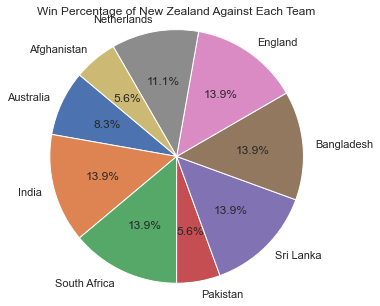

In [59]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentages_wc_nz.values(),labels=win_percentages_wc_nz.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of New Zealand Against Each Team')
plt.show()

#Stats of England team

In [60]:
# Filter the 'results' DataFrame to include rows where England played either as Team_1 or Team_2
df4 = results[(results['Team_1'] == 'England') | (results['Team_2'] == 'England')]
England = df4.iloc[:]
England.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
55,11/11/2015,Pakistan,England,Pakistan,Pakistan won by 6 wickets,Sheikh Zayed Stadium
57,13/11/2015,Pakistan,England,England,England won by 95 runs,Sheikh Zayed Stadium
58,17/11/2015,Pakistan,England,England,England won by 6 wickets,Sharjah Cricket Stadium


In [61]:
# Filtering the 'England' dataframe to create a new dataframe 'England_win' containing rows where the 'Winner' column is 'England'.
England_win = England[England['Winner']=='England']
England_win

,Date,Team_1,Team_2,Winner,Margin,Ground
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
59,20/11/2015,Pakistan,England,England,England won by 84 runs,Dubai International Cricket Stadium
78,03/02/2016,South Africa,England,England,won by 39 runs,Mangaung Oval
80,06/02/2016,South Africa,England,England,won by 5 wickets,St George's Park
134,07/10/2016,Bangladesh,England,England,won by 21 runs,Shere Bangla National Stadium
137,12/10/2016,Bangladesh,England,England,won by 4 wickets,Zahur Ahmed Chowdhury Stadium
185,09/03/2017,West Indies,England,England,won by 186 runs,Kensington Oval
274,14/01/2018,Australia,England,England,won by 5 wickets,Melbourne Cricket Ground
278,18/01/2018,Australia,England,England,won by 4 wickets,Brisbane Cricket Ground
281,21/01/2018,Australia,England,England,won by 16 runs,Sydney Cricket Ground


#No.of wins for England against other team

In [62]:
excluded_value = 'England'
df2 = England_win[England_win['Team_2']!= excluded_value]
value_counts2 = df2['Team_2'].value_counts()

df1 = England_win[England_win['Team_1']!= excluded_value]
value_counts1 = df1['Team_1'].value_counts()
print("Team_2 value counts:")
print(value_counts2)

print("\nTeam_1 value counts:")
print(value_counts1)

Team_2 value counts:
Team_2
Pakistan        5
Australia       2
India           2
New Zealand     2
Ireland         2
Sri Lanka       2
West Indies     1
South Africa    1
Name: count, dtype: int64

Team_1 value counts:
Team_1
Australia        4
Netherlands      3
South Africa     2
Bangladesh       2
New Zealand      2
Sri Lanka        2
South Africa     2
Bangladesh       2
Pakistan         1
West Indies      1
New Zealand      1
Sri Lanka        1
Ireland          1
India            1
Name: count, dtype: int64


#Win Percentage of England Against Each Team

In [63]:
# Out of the 775 ODI matches played by England, number of matches won against the following teams
team_win_counts = {
    'India': 44,
    'New Zealand': 42,
    'South Africa ': 29,
    'Australia': 63,
    'Sri Lanka': 38,
    'Bangladesh': 19,
    'Pakistan': 56,
    'Netherlands': 6,
    'Afghanistan': 2
}

Total_matches = sum(team_win_counts.values())
Total_matches

299

In [64]:
win_percentage = {team: (wins / Total_matches) * 100 for team, wins in team_win_counts.items()}

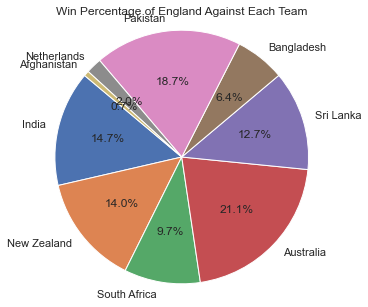

In [65]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentage.values(),labels=win_percentage.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of England Against Each Team')
plt.show()

#Win Percentage of England in the ODI world cup

In [66]:
# Out of the 83 ODI matches played by England in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_eng = {
    'Australia': 3,
    'India': 4,
    'South Africa ': 4,
    'Pakistan': 4,
    'Sri Lanka': 6,
    'Bangladesh': 5,
    'New Zealand': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

Total_matches_wc_eng= sum(team_win_counts_wc_eng.values())
Total_matches_wc_eng

37

In [67]:
win_percentages_wc_eng = {team: (wins / Total_matches_wc_eng) * 100 for team, wins in team_win_counts_wc_eng.items()}

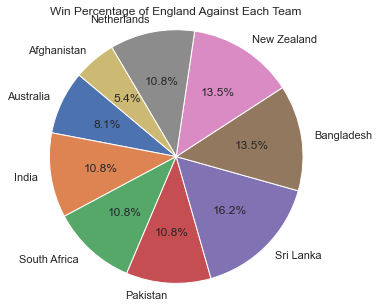

In [68]:
#Pie chart
plt.figure(figsize=(5,5))
plt.pie(win_percentages_wc_eng.values(),labels=win_percentages_wc_eng.keys(),autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title('Win Percentage of England Against Each Team')
plt.show()

#Exploratory data analysis

In [69]:
# List of cricket teams participating in the world cup
Wc_team = ['England', ' South Africa', '', 'West Indies','Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

# Filtering matches involving only teams in the 'worldcup_teams' list
df_team1 = results[results['Team_1'].isin(Wc_team)]  # Extracts matches with Team_1 in 'Wc_team'
df_team2 = results[results['Team_2'].isin(Wc_team)]

In [70]:
# Combining the filtered dataframes
df_teams = pd.concat((df_team1, df_team2))
df_teams.drop_duplicates()   # Removes duplicate rows if any
df_teams.count() # Counts the number of rows in the final dataframe

Date      748
Team_1    748
Team_2    748
Winner    748
Margin    748
Ground    748
dtype: int64

In [71]:
df_teams.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
53,07/11/2015,Sri Lanka,West Indies,Sri Lanka,Sri Lanka won by 19 runs,Pallekele International Cricket Stadium
56,11/11/2015,Bangladesh,Zimbabwe,Bangladesh,Bangladesh won by 61 runs,Shere Bangla National Stadium


In [72]:
# Removing unnecessary column from df_teams
df_teams_wc = df_teams.drop(['Date','Ground','Margin'],axis=1)
df_teams_wc.head()

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
35,England,Australia,England
53,Sri Lanka,West Indies,Sri Lanka
56,Bangladesh,Zimbabwe,Bangladesh


In [73]:
df_teams_wc

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
35,England,Australia,England
53,Sri Lanka,West Indies,Sri Lanka
56,Bangladesh,Zimbabwe,Bangladesh
...,...,...,...
716,Bangladesh,Afghanistan,Afghanistan
718,Sri Lanka,West Indies,Sri Lanka
719,Bangladesh,Afghanistan,Afghanistan
720,Netherlands,Sri Lanka,Sri Lanka


#Feature Selection

In [74]:
# Reset the index of df_teams_wc while dropping the old index.
df_teams_wc = df_teams_wc.reset_index(drop=True)

# Set a value of 1 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_1' column.
df_teams_wc.loc[df_teams_wc.Winner == df_teams_wc.Team_1,'winning_team']=1

# Set a value of 2 in the 'winning_team' column for rows where the 'Winner' column is the same as the 'Team_2' column.
df_teams_wc.loc[df_teams_wc.Winner == df_teams_wc.Team_2, 'winning_team']=2

# Drop the 'winning_team' column from the DataFrame.
df_teams_wc = df_teams_wc.drop(['winning_team'], axis=1)

# Display the first few rows of the modified DataFrame using df_teams_wc.head().
df_teams_wc.head()

,Team_1,Team_2,Winner
0,England,New Zealand,New Zealand
1,Bangladesh,India,Bangladesh
2,England,Australia,England
3,Sri Lanka,West Indies,Sri Lanka
4,Bangladesh,Zimbabwe,Bangladesh


#Model Training and Evaluation

In [75]:
# Creating dummy variables for team names
final = pd.get_dummies(df_teams_wc, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

In [76]:
x = final.drop(['Winner'], axis=1)  # Extracting features by dropping the 'Winner' column
y = final["Winner"]  # Assigning the 'Winner' column as the target variable


In [147]:
# Split the data into training and testing sets using a test size of 20% and a random state of 2023
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((598, 50), (150, 50), (598,), (150,))

In [149]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Afghanistan,Team_1_Australia,Team_1_Australia,Team_1_Bangladesh,Team_1_Bangladesh,Team_1_England,Team_1_England,Team_1_Hong Kong,...,Team_2_India,Team_2_Ireland,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_United Arab Emirates,Team_2_West Indies,Team_2_Zimbabwe
0,New Zealand,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,Bangladesh,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,England,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sri Lanka,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Bangladesh,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [150]:
# Scale the feature using StandardScalar
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

#Applying Random forest classifier algorithm

In [164]:
# Import the Random forest module from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create an Random forest classifier with a linear kernel
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
pred = rf.predict(X_test)

# Calculating training set score:
score = rf.score(X_train, y_train)

# Calculating test set score:
score2 = rf.score(X_test, y_test)


#Result

In [165]:
# Printing the training set accuracy with 3 decimal places
print("Training set accuracy: ", '%.3f'%(score))

# Printing the test set accuracy with 3 decimal places
print("Testing set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.749
Testing set accuracy:  0.673


#Conclusion

#Our machine learning project successfully built a predictive model for World Cup winners,using historical match data and team attributes. The model showed promising performance, considering metrics like accuracy and precision. Challenges include limited data and the dynamic nature of team dynamics. Continuous refinement is essential for keeping the model accurate and relevant, especially in the face of evolving player performances and unforeseen events. Overall, this project offers a valuable tool for predicting World Cup outcomes, with the need for ongoing updates and adaptation.